<a href="https://colab.research.google.com/github/Willy-Angole/Age-gender-genie/blob/main/Vend_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the data and view the first five rows
df = pd.read_csv("cell_samples - cell_samples.csv")
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
#print the last five rows
df.tail()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [4]:
#check rows and column
df.shape

(699, 10)

In [5]:
#check the basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        699 non-null    int64 
 1   UnifSize     699 non-null    int64 
 2   UnifShape    699 non-null    int64 
 3   MargAdh      699 non-null    int64 
 4   SingEpiSize  699 non-null    int64 
 5   BareNuc      699 non-null    object
 6   BlandChrom   699 non-null    int64 
 7   NormNucl     699 non-null    int64 
 8   Mit          699 non-null    int64 
 9   Class        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
#check the data types
df.dtypes

Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
#summary statistics
df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
#check missing values
df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [13]:
#check for duplicates
df.duplicated().sum()

236

In [15]:
#drop the categorical column for gender
df = df.drop('BareNuc', axis = 1)
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [16]:
#set a number of clusters at initialization
k_means = KMeans(n_clusters = 5)

#fit the clustering algorithim
k_means.fit(df)

KMeans(n_clusters=5)

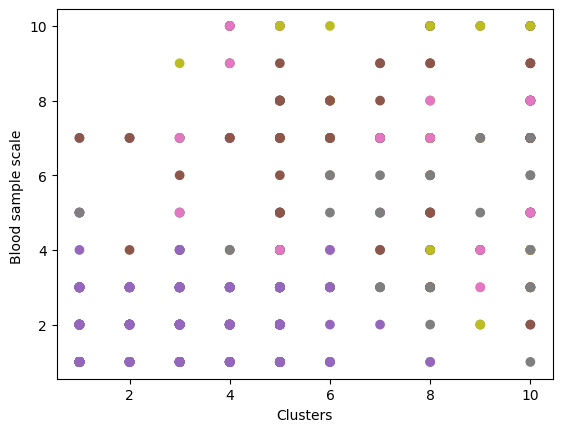

array(['tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive'],
      dtype='<U10')

In [23]:
color_map = np.array(['tab:purple','tab:brown','tab:pink','tab:gray','tab:olive'])
color_indx = color_map[k_means.labels_]

plt.scatter(df['Clump'], df['BlandChrom'], c=color_indx)
plt.xlabel("Clusters")
plt.ylabel("Blood sample scale ")
plt.show()
map_color =list(zip(color_map,range(0,5)))

display(color_map)

In [24]:
#generate cluster index values for each row
cluster_assignments = k_means.predict(df)
cluster_assignments

array([0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 2, 0, 3, 1,
       0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 3, 1, 3, 2, 2,
       1, 0, 1, 0, 0, 1, 3, 3, 3, 4, 2, 3, 1, 3, 3, 3, 3, 0, 2, 3, 0, 3,
       0, 3, 4, 0, 0, 4, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 3, 3, 0, 3, 4, 3, 2, 1, 0, 3,
       0, 3, 3, 2, 0, 0, 3, 4, 0, 0, 0, 0, 2, 3, 1, 0, 3, 0, 3, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 4, 0, 3, 1, 0,
       0, 3, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 4, 3, 1,
       0, 1, 0, 3, 0, 0, 0, 1, 2, 0, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 3, 0,
       0, 0, 1, 2, 0, 0, 0, 4, 2, 0, 0, 0, 4, 1, 0, 4, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 3, 1, 3, 3, 0, 0, 4, 1, 4, 3, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 3, 2, 2, 3, 0, 0, 0, 3, 2, 4, 1, 3,
       2, 0, 2, 3, 4, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 1,
       4, 0, 3, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 3, 1,

In [25]:
#evaluate the best value for k, number of clusters,,use calinski_harabasz_score
print(calinski_harabasz_score(df, cluster_assignments))

433.62784134491903
